![Net Image](https://www.lynchburg.edu/wp-content/uploads/statistics-and-data-science/banner-statistics-and-data-science-1.jpg "Banner | Proyecto 1")

## Análisis de datos | Proyecto Fase 1 <img src="https://media.tenor.com/dHk-LfzHrtwAAAAi/linux-computer.gif" alt="drawing" width="30"/>

### Integrantes | Grupo 1

| Carnet     | Nombre                        |
|-----------|-------------------------------|
| 201800476 | Marvin Alexis Estrada Florian |
| 201480017 | Erick Javier Bernal Orellana  |
| 201403517 | Luis Roberto Boror Yoc        |
| 201700898 | Pablo José Oliva Bonilla      |

### Carga de datos

In [1]:
import pandas as pd
from statistics import mode

df = pd.read_csv('SimioFreshMexDataset.csv')
print(df)

           ArrivalDate  OrderPrepTime  ProteinsTime  ToppingsTime  \
0      12/7/2023 10:05           16.5          12.3          15.3   
1      12/7/2023 10:08           15.6          13.1          15.1   
2      12/7/2023 10:10           23.0          13.1           8.5   
3      12/7/2023 10:09           32.4          19.8          39.4   
4      12/7/2023 10:22           41.3          23.0          23.1   
...                ...            ...           ...           ...   
16029   1/5/2024 21:53           36.3          23.7          47.4   
16030   1/5/2024 21:58           29.2          25.2          30.4   
16031   1/5/2024 21:53           35.2          29.7          33.4   
16032   1/5/2024 21:58           32.9          23.6          38.6   
16033   1/5/2024 21:58           34.6          18.9          21.5   

       PackagingTime  PayTime  DiningRoomTime OrderType OrderModality  \
0               27.2      0.0            0.00   Burrito        Online   
1               34.3     

### Limpieza de datos

In [2]:
df = df.drop_duplicates()
print(df)

           ArrivalDate  OrderPrepTime  ProteinsTime  ToppingsTime  \
0      12/7/2023 10:05           16.5          12.3          15.3   
1      12/7/2023 10:08           15.6          13.1          15.1   
2      12/7/2023 10:10           23.0          13.1           8.5   
3      12/7/2023 10:09           32.4          19.8          39.4   
4      12/7/2023 10:22           41.3          23.0          23.1   
...                ...            ...           ...           ...   
16029   1/5/2024 21:53           36.3          23.7          47.4   
16030   1/5/2024 21:58           29.2          25.2          30.4   
16031   1/5/2024 21:53           35.2          29.7          33.4   
16032   1/5/2024 21:58           32.9          23.6          38.6   
16033   1/5/2024 21:58           34.6          18.9          21.5   

       PackagingTime  PayTime  DiningRoomTime OrderType OrderModality  \
0               27.2      0.0            0.00   Burrito        Online   
1               34.3     

### Descripción de variables

In [3]:
print(df.head())

       ArrivalDate  OrderPrepTime  ProteinsTime  ToppingsTime  PackagingTime  \
0  12/7/2023 10:05           16.5          12.3          15.3           27.2   
1  12/7/2023 10:08           15.6          13.1          15.1           34.3   
2  12/7/2023 10:10           23.0          13.1           8.5           29.9   
3  12/7/2023 10:09           32.4          19.8          39.4           38.6   
4  12/7/2023 10:22           41.3          23.0          23.1           23.6   

   PayTime  DiningRoomTime OrderType OrderModality      PromiseTime  
0      0.0             0.0   Burrito        Online  12/7/2023 10:20  
1      0.0             0.0     Tacos        Online  12/7/2023 10:23  
2      0.0             0.0     Tacos        Online  12/7/2023 10:25  
3     58.1             0.0      Bowl      InPerson              NaN  
4     64.4            14.8      Bowl      InPerson              NaN  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16034 entries, 0 to 16033
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ArrivalDate     16034 non-null  object 
 1   OrderPrepTime   16034 non-null  float64
 2   ProteinsTime    16034 non-null  float64
 3   ToppingsTime    16034 non-null  float64
 4   PackagingTime   16034 non-null  float64
 5   PayTime         16034 non-null  float64
 6   DiningRoomTime  16034 non-null  float64
 7   OrderType       16034 non-null  object 
 8   OrderModality   16034 non-null  object 
 9   PromiseTime     3728 non-null   object 
dtypes: float64(6), object(4)
memory usage: 1.2+ MB
None


In [5]:
print(df.describe())

       OrderPrepTime  ProteinsTime  ToppingsTime  PackagingTime       PayTime  \
count   16034.000000  16034.000000  16034.000000   16034.000000  16034.000000   
mean       29.491743     20.594499     27.432699      30.031358     44.148410   
std         8.504381      5.827847     10.104568       7.349956     19.195186   
min        10.000000      5.200000      5.000000      15.100000      0.000000   
25%        23.200000     17.300000     18.800000      24.400000     37.900000   
50%        31.400000     22.200000     28.500000      29.100000     47.000000   
75%        36.000000     25.000000     34.900000      35.200000     56.600000   
max        44.900000     29.900000     49.700000      49.800000     79.500000   

       DiningRoomTime  
count    16034.000000  
mean        11.035630  
std          8.925642  
min          0.000000  
25%          0.000000  
50%         12.890000  
75%         18.127500  
max         29.830000  


### Medidas para el análisis

In [6]:
# Convertir ArrivalDate a tipo datetime
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])

# Medidas

# Máximo número de pedidos en un día
max_orders_per_day = df['ArrivalDate'].value_counts().max()

# Mínimo número de pedidos en un día
min_orders_per_day = df['ArrivalDate'].value_counts().min()

# Media de pedidos en un día
mean_orders_per_day = df['ArrivalDate'].value_counts().mean()

# Moda del producto más pedido
mode_order_type = mode(df['OrderType'])

# Mínimo del tiempo de preparación
min_prep_time = df['OrderPrepTime'].min()

# Mínimo del tiempo de proteinas
min_proteins_time = df['ProteinsTime'].min()

# Mínimo del tiempo de complementos
min_toppings_time = df['ToppingsTime'].min()

# Media del tiempo empacando
mean_packaging_time = df['PackagingTime'].mean()

# Media del tiempo pagando sin tomar en cuenta los pedidos en línea
mean_pay_time = df[df['PayTime'] != 0.0]['PayTime'].mean()

# Media del tiempo comiendo en el restaurante sin tomar en cuenta los pedidos en línea
mean_dining_time = df[df['DiningRoomTime'] != 0.0]['DiningRoomTime'].mean()

# Moda de modalidad del pedido
mode_order_modality = mode(df['OrderModality'])

# Media de espera del cliente en el proceso general
df['TotalWaitTime'] = df['OrderPrepTime'] + df['ProteinsTime'] + df['ToppingsTime'] + df['PackagingTime'] + df['PayTime']
mean_total_wait_time = df['TotalWaitTime'].mean()

# Porcentajes de pedidos en línea y pedidos presenciales
order_modality_counts = df['OrderModality'].value_counts(normalize=True) * 100
percentage_online_orders = order_modality_counts['Online']
percentage_inperson_orders = order_modality_counts['InPerson']

# Media del tiempo de espera por tipo de pedido si es en línea o pedidos presenciales
df['TotalWaitTimeByModality'] = df[['OrderPrepTime', 'ProteinsTime', 'ToppingsTime', 'PackagingTime', 'PayTime']].sum(axis=1)
mean_wait_time_online = df[df['OrderModality'] == 'Online']['TotalWaitTimeByModality'].mean()
mean_wait_time_inperson = df[df['OrderModality'] == 'InPerson']['TotalWaitTimeByModality'].mean()

# Mínimo de tiempo de preparación para cada tipo de producto
min_prep_time_by_type = df.groupby('OrderType')[['OrderPrepTime', 'ProteinsTime', 'ToppingsTime', 'PackagingTime']].min().sum(axis=1)

print("Máximo número de pedidos en un día:", max_orders_per_day)
print("Mínimo número de pedidos en un día:", min_orders_per_day)
print("Media de pedidos en un día:", mean_orders_per_day)
print("Moda del producto más pedido:", mode_order_type)
print("Moda del tipo de pedido:", mode_order_modality)
print("Mínimo del tiempo en preparación:", min_prep_time, "segundos")
print("Mínimo del tiempo en proteinas:", min_proteins_time, "segundos")
print("Mínimo del tiempo en complementos:", min_toppings_time, "segundos")
print("Media del tiempo empaquetando:", mean_packaging_time, "segundos")
print("Media del tiempo pagando:", mean_pay_time, "segundos")
print("Media del tiempo que pasan los clientes en restaurante comiendo:", mean_dining_time, "minutos")
print("Media de espera del cliente en el proceso general:", mean_total_wait_time, "segundos")
print("Porcentaje de pedidos Online:", percentage_online_orders)
print("Porcentaje de pedidos InPerson:", percentage_inperson_orders)
print("Media del tiempo de espera en el proceso con pedido en línea:", mean_wait_time_online, "segundos")
print("Media del tiempo de espera en el proceso con pedido presencial:", mean_wait_time_inperson, "segundos")
print("Mínimo de tiempo de preparación para cada tipo de producto en segundos:")
print(min_prep_time_by_type)

Máximo número de pedidos en un día: 6
Mínimo número de pedidos en un día: 1
Media de pedidos en un día: 1.4753404490246596
Moda del producto más pedido: Bowl
Moda del tipo de pedido: InPerson
Mínimo del tiempo en preparación: 10.0 segundos
Mínimo del tiempo en proteinas: 5.2 segundos
Mínimo del tiempo en complementos: 5.0 segundos
Media del tiempo empaquetando: 30.03135836347761 segundos
Media del tiempo pagando: 49.92774721399351 segundos
Media del tiempo que pasan los clientes en restaurante comiendo: 16.6976776446164 minutos
Media de espera del cliente en el proceso general: 151.69870899338906 segundos
Porcentaje de pedidos Online: 23.250592490956716
Porcentaje de pedidos InPerson: 76.7494075090433
Media del tiempo de espera en el proceso con pedido en línea: 96.72076180257511 segundos
Media del tiempo de espera en el proceso con pedido presencial: 168.35381927515033 segundos
Mínimo de tiempo de preparación para cada tipo de producto en segundos:
OrderType
Bowl       35.7
Burrito   

### Gráficas

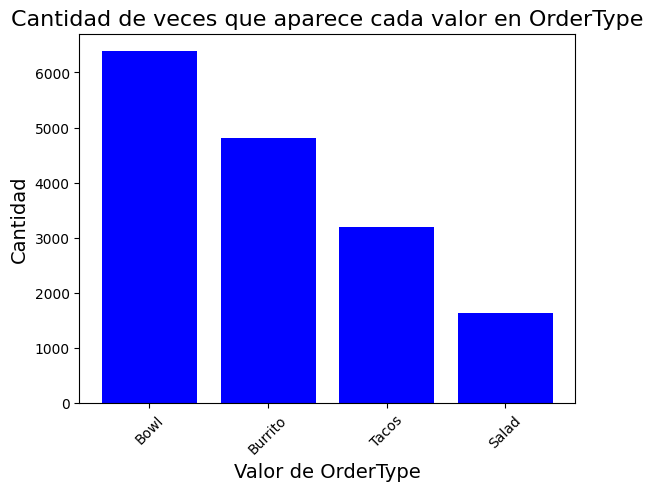

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
# Leer el archivo CSV
datos = pd.read_csv('SimioFreshMexDataset.csv')

# Contar la cantidad de veces que aparece cada valor en la columna OrderType
conteo_ordenes = datos["OrderType"].value_counts()

# Ordenar los valores de OrderType por la cantidad de veces que aparecen
conteo_ordenes = conteo_ordenes.sort_values(ascending=False)

# Crear la gráfica de barras
plt.bar(conteo_ordenes.index, conteo_ordenes, color="blue")
plt.title("Cantidad de veces que aparece cada valor en OrderType", fontsize=16)
plt.xlabel("Valor de OrderType", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=45)
plt.show()

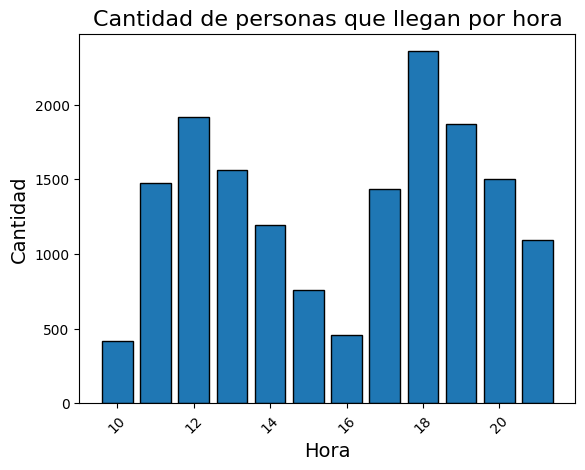

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('SimioFreshMexDataset.csv')

# Convertir la columna ArrivalDate a tipo datetime
datos["ArrivalDate"] = pd.to_datetime(datos["ArrivalDate"])

# Extraer la hora de la columna ArrivalDate
datos["Hora"] = datos["ArrivalDate"].dt.hour

# Contar la cantidad de veces que aparece cada hora en la columna Hora
conteo_horas = datos["Hora"].value_counts()

# Ordenar las horas por la cantidad de personas que llegan
conteo_horas = conteo_horas.sort_values(ascending=False)

# Crear la gráfica de barras
plt.bar(conteo_horas.index, conteo_horas, edgecolor="black")
plt.title("Cantidad de personas que llegan por hora", fontsize=16 )
plt.xlabel("Hora", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=45)
plt.show()

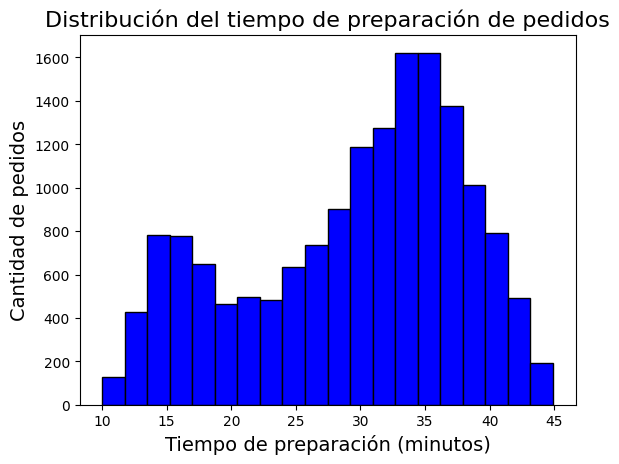

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('SimioFreshMexDataset.csv')

if datos["OrderPrepTime"].any():
    # Crear la gráfica de distribución
    plt.hist(datos["OrderPrepTime"], bins=20, color="blue" , edgecolor="black")
    plt.title("Distribución del tiempo de preparación de pedidos", fontsize=16)
    plt.xlabel("Tiempo de preparación (minutos)", fontsize=14)
    plt.ylabel("Cantidad de pedidos", fontsize=14)
    # Mostrar la gráfica
    plt.show()

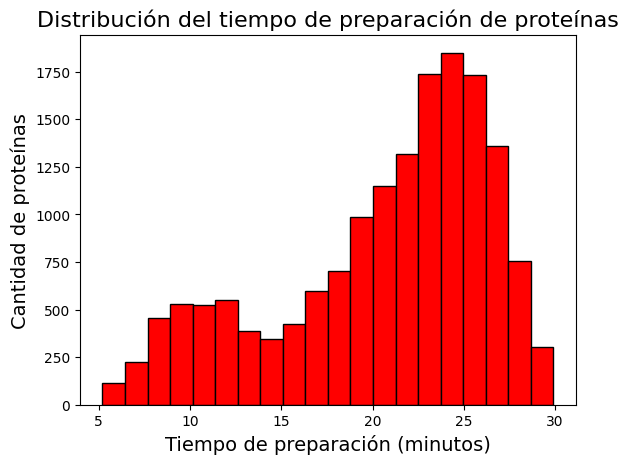

In [11]:


# Crear la gráfica de distribución
plt.hist(datos["ProteinsTime"], bins=20, color="red" , edgecolor="black")
plt.title("Distribución del tiempo de preparación de proteínas", fontsize=16)
plt.xlabel("Tiempo de preparación (minutos)", fontsize=14)
plt.ylabel("Cantidad de proteínas", fontsize=14)
# Mostrar la gráfica
plt.show()

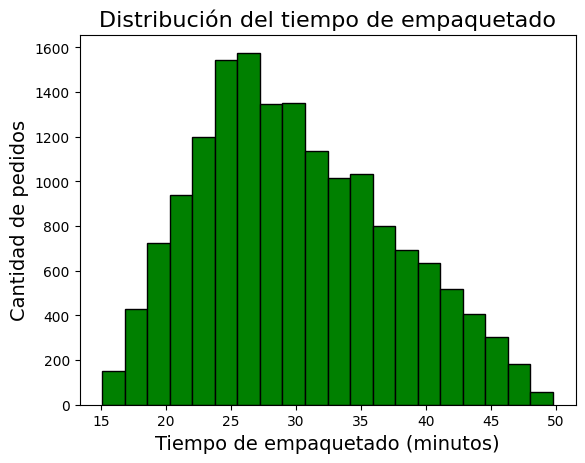

In [12]:
import seaborn as sns
import numpy

# Agrupar los datos por el tiempo de empaquetado
empaquetado_agrupado = datos["PackagingTime"].value_counts()

# Crear la gráfica de distribución
plt.hist(datos["PackagingTime"], bins=20, color="green", edgecolor="black")
plt.title("Distribución del tiempo de empaquetado", fontsize=16)
plt.xlabel("Tiempo de empaquetado (minutos)", fontsize=14)
plt.ylabel("Cantidad de pedidos", fontsize=14)


# Mostrar la gráfica
plt.show()

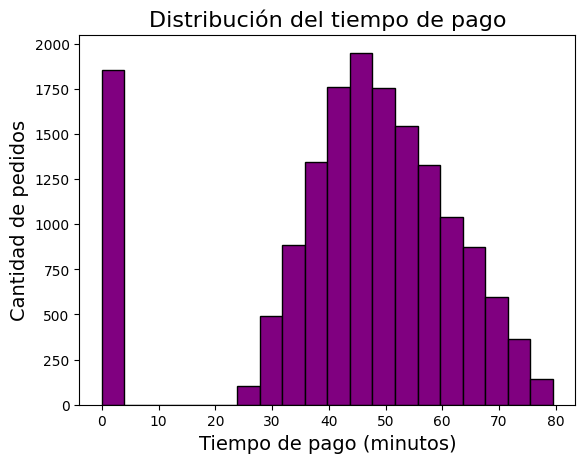

In [13]:
# Crear la gráfica de distribución
plt.hist(datos["PayTime"], bins=20, color="purple" , edgecolor="black")
plt.title("Distribución del tiempo de pago", fontsize=16)
plt.xlabel("Tiempo de pago (minutos)", fontsize=14)
plt.ylabel("Cantidad de pedidos", fontsize=14)
# Mostrar la gráfica
plt.show()

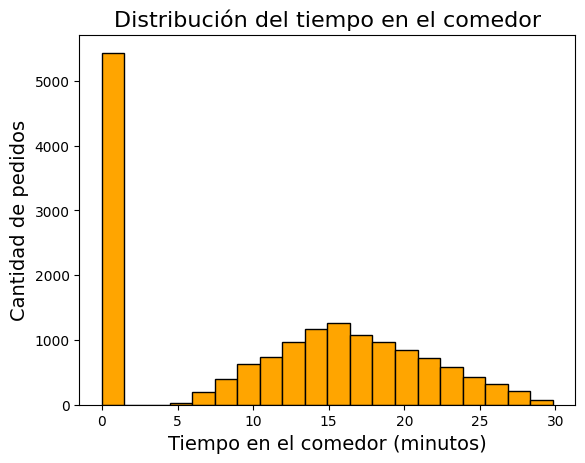

In [14]:
# Crear la gráfica de distribución
plt.hist(datos["DiningRoomTime"], bins=20, color="orange" , edgecolor="black")
plt.title("Distribución del tiempo en el comedor", fontsize=16)
plt.xlabel("Tiempo en el comedor (minutos)", fontsize=14)
plt.ylabel("Cantidad de pedidos", fontsize=14)

# Mostrar la gráfica
plt.show()


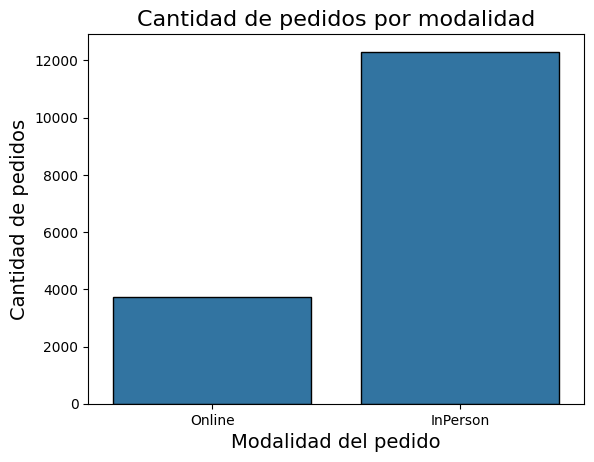

In [15]:
# Crear la gráfica de conteo
sns.countplot(x=datos["OrderModality"] , edgecolor="black")
plt.title("Cantidad de pedidos por modalidad", fontsize=16)
plt.xlabel("Modalidad del pedido", fontsize=14)
plt.ylabel("Cantidad de pedidos", fontsize=14)

# Mostrar la gráfica
plt.show()

### Distribuciones

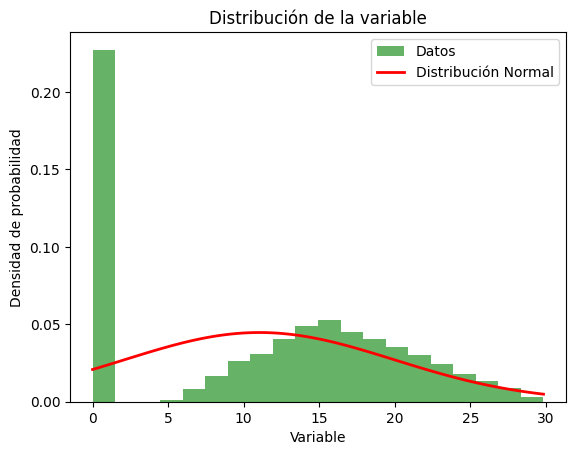

La mejor distribución ajustada es: Normal
El p-valor asociado es: 0.0


In [17]:
import numpy as np
from scipy.stats import norm, binom, poisson, ks_2samp
import matplotlib.pyplot as plt

def determine_distribution(data):
    # Calcula la media y la desviación estándar de los datos
    mean = np.mean(data)
    std = np.std(data)
    
    # Realiza la prueba de Kolmogorov-Smirnov con la distribución normal
    normal_pval = ks_2samp(data, norm.rvs(loc=mean, scale=std, size=len(data)))[1]
    
    # Realiza la prueba de Kolmogorov-Smirnov con la distribución binomial
    binomial_pval = ks_2samp(data, binom.rvs(len(data), 0.5, size=len(data)))[1]
    
    # Realiza la prueba de Kolmogorov-Smirnov con la distribución de Poisson
    poisson_pval = ks_2samp(data, poisson.rvs(mean, size=len(data)))[1]
    
    # Ajusta una función cuadrática a los datos y calcula el error cuadrático medio
    quadratic_fit = np.polyfit(np.arange(len(data)), data, 2)
    quadratic_error = np.mean((np.polyval(quadratic_fit, np.arange(len(data))) - data) ** 2)
    
    # Calcula el p-valor asociado a la distribución cuadrática
    quadratic_pval = 1 / (1 + quadratic_error)
    
    # Compara los p-valores y determina la mejor distribución
    p_values = {'Normal': normal_pval, 'Binomial': binomial_pval, 'Poisson': poisson_pval, 'Cuadratica': quadratic_pval}
    best_fit = min(p_values, key=p_values.get)
    
    # Graficar histograma con la distribución ajustada
    plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Datos')

    # Distribución ajustada
    if best_fit == 'Normal':
        x = np.linspace(np.min(data), np.max(data), 100)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Distribución Normal')
    elif best_fit == 'Binomial':
        x = np.arange(0, np.max(data)+1)
        plt.plot(x, binom.pmf(x, len(data), 0.5), 'r-', lw=2, label='Distribución Binomial')
    elif best_fit == 'Poisson':
        x = np.arange(0, np.max(data)+1)
        plt.plot(x, poisson.pmf(x, mean), 'r-', lw=2, label='Distribución de Poisson')
    elif best_fit == 'Cuadratica':
        x = np.arange(len(data))
        plt.plot(x, np.polyval(quadratic_fit, x), 'r-', lw=2, label='Distribución Cuadrática')

    plt.xlabel('Variable')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Distribución de la variable')
    plt.legend()
    plt.show()
    
    return best_fit, p_values[best_fit]

data = df['DiningRoomTime'] # -> Se sustituye el valor de la variable
best_distribution, p_value = determine_distribution(data)
print("La mejor distribución ajustada es:", best_distribution)
print("El p-valor asociado es:", p_value)